In [137]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
sns.set_theme(style="darkgrid", context="notebook", palette="muted", font="Arial")

In [59]:
# importing the dataset
sales = pd.read_csv('advertising.csv')


In [61]:
# printing the head of the dataset
sales.head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5


In [63]:
# printing the tail of the dataset
sales.tail(4)

,TV,Radio,Newspaper,Sales
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [64]:
# checking the shape of the dataset
sales.shape

(200, 4)

In [67]:
# checking the info of the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [69]:
# checking if there is null value in the dataset
sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [71]:
# checking if there is duplicate in the dataset
sales.duplicated().sum()

0

In [73]:
# checking the statistical info of the dataset
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [75]:
# checking the columns in the dataset
sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [77]:
# checking the correlation 
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


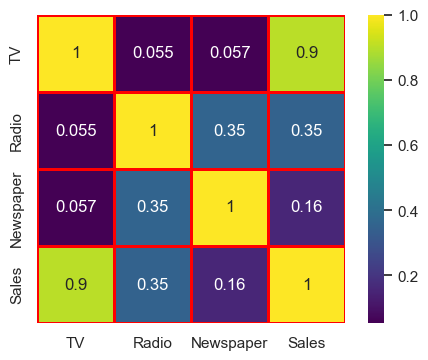

In [79]:
# visualizing the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(data=sales.corr(), annot=True, square=True, cmap='viridis', linecolor='red', linewidths= 1)
plt.show()


Relationship between the varaibles and the target columns

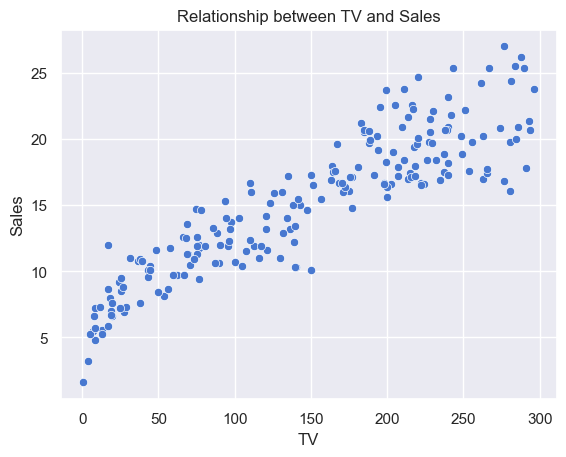

In [84]:
sns.scatterplot(data = sales, x='TV', y='Sales', palette='pastel')
plt.title('Relationship between TV and Sales')
plt.show()

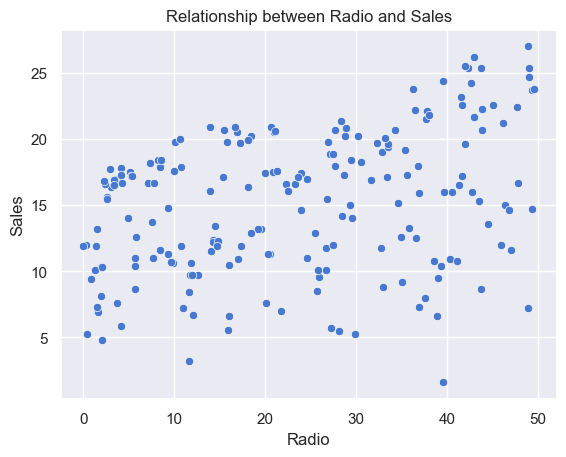

In [86]:
sns.scatterplot(data = sales, x='Radio', y='Sales', palette='pastel')
plt.title('Relationship between Radio and Sales')
plt.show()

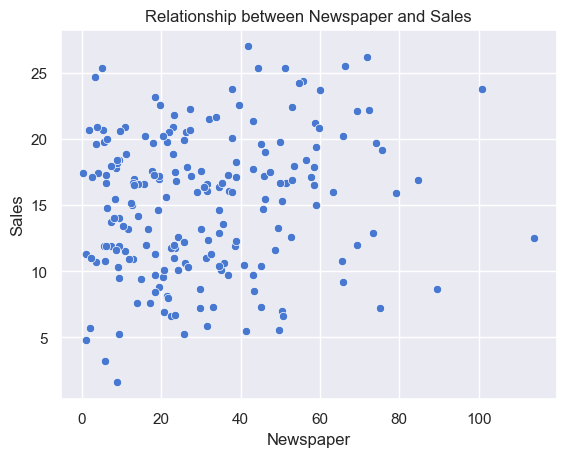

In [88]:
sns.scatterplot(data = sales, x='Newspaper', y='Sales', palette='pastel')
plt.title('Relationship between Newspaper and Sales')
plt.show()

checking the distribution of the variables

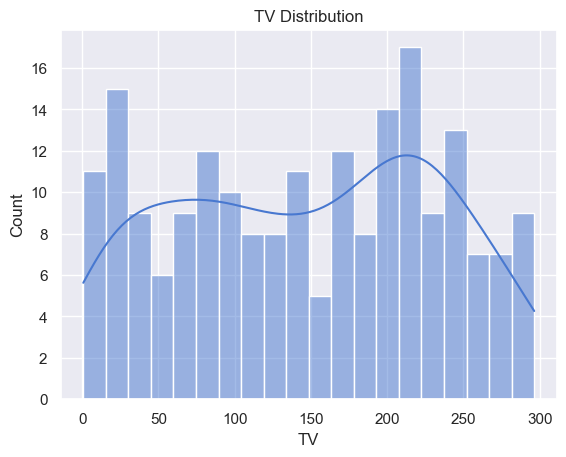

In [93]:
sns.histplot(data = sales, x='TV', bins=20, kde= True)
plt.title('TV Distribution')
plt.show()

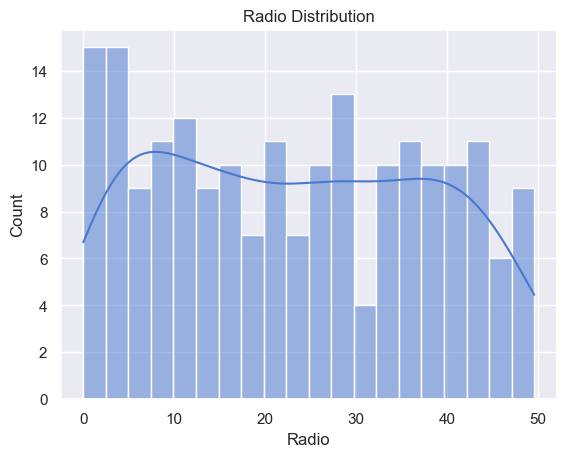

In [95]:
sns.histplot(data = sales, x='Radio', bins=20, kde= True)
plt.title('Radio Distribution')
plt.show()

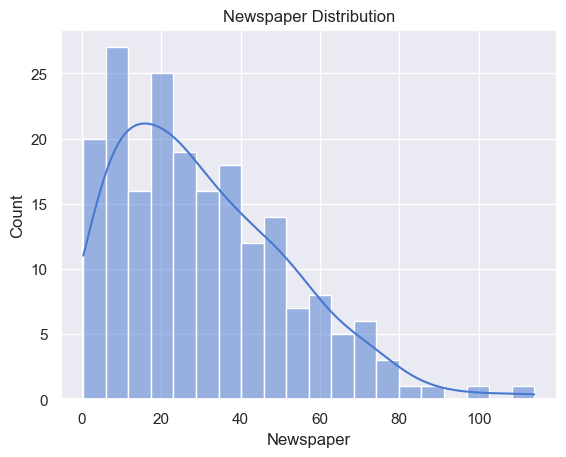

In [97]:
sns.histplot(data = sales, x='Newspaper', bins=20, kde= True)
plt.title('Newspaper Distribution')
plt.show()

checking for the outliers

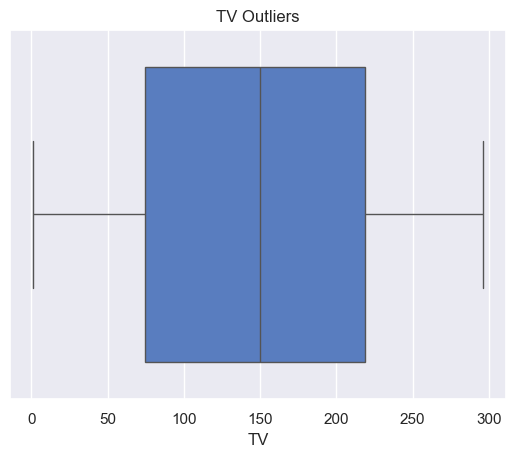

In [102]:
sns.boxplot(data = sales, x ='TV')
plt.title('TV Outliers')
plt.show()

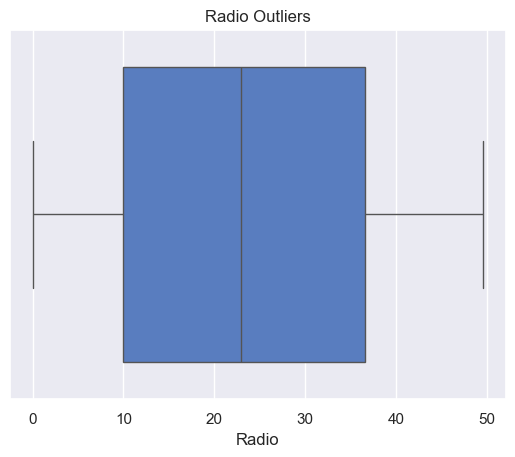

In [104]:
sns.boxplot(data = sales, x ='Radio')
plt.title('Radio Outliers')
plt.show()

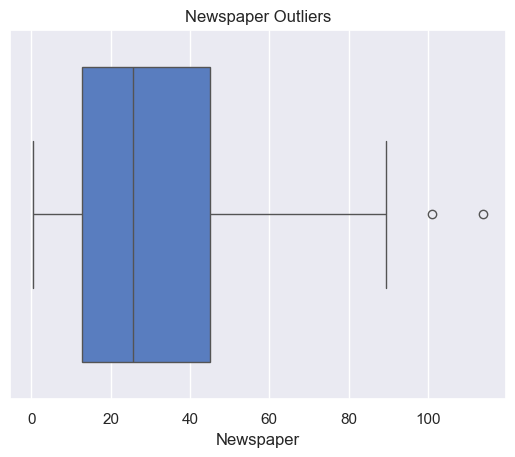

In [106]:
sns.boxplot(data = sales, x ='Newspaper')
plt.title('Newspaper Outliers')
plt.show()

In [108]:
# removing the outlier of the Newspaper 
Q1 = sales['Newspaper'].quantile(0.25)
Q3 = sales['Newspaper'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [121]:
sale =sales[(sales['Newspaper'] >= lower_bound) & (sales['Newspaper'] <= upper_bound)]

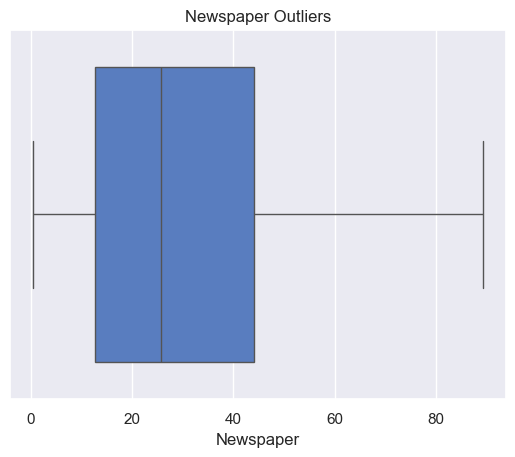

In [127]:
# checking back the column after the removal of the outlier
sns.boxplot(data = sale, x ='Newspaper')
plt.title('Newspaper Outliers')
plt.show()

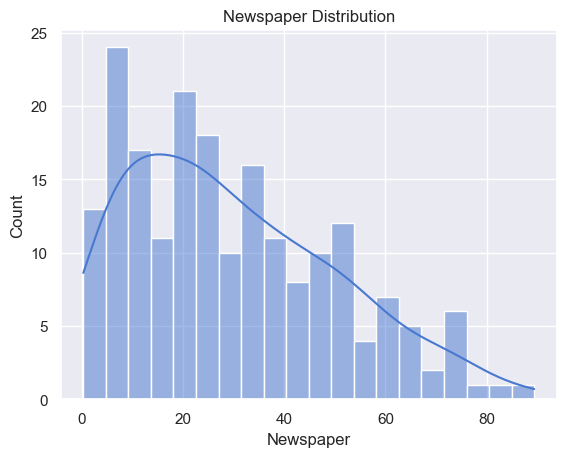

In [133]:
# checking back the distribution after removing the outlier
sns.histplot(data = sale, x='Newspaper', bins=20, kde= True)
plt.title('Newspaper Distribution')
plt.show()

In [129]:
# spliting the data into dependent and target variables
X = sale.drop('Sales', axis=1)
y = sale['Sales']

In [141]:
# spliting the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [143]:
# standardize the feature
scaled = StandardScaler()
X_train_scaler = scaled.fit_transform(X_train)
X_test_scaler = scaled.transform(X_test)

 initializ the models

In [152]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaler, y_train)
lr_pred =lr.predict(X_test_scaler)
lr_r2 = r2_score(y_test, lr_pred)

In [154]:
lr_r2

0.9130003152798274

In [156]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train_scaler, y_train)
dt_pred =dt.predict(X_test_scaler)
dt_r2 = r2_score(y_test, dt_pred)

In [158]:
dt_r2

0.9232454955684966

In [160]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train_scaler, y_train)
rf_pred =rf.predict(X_test_scaler)
rf_r2 = r2_score(y_test, rf_pred)

In [162]:
rf_r2

0.9605398268094254

# After initializing the 3 models, RandomForestRegressor has highest percenteage

In [177]:
# Test the predicted model on the dataset
X_new = X_test.iloc[10]
X_new_scaler = scaled.transform([X_new])

rf.predict(X_new_scaler)

array([16.877])

In [181]:
y_test.iloc[10]

16.4